<a href="https://colab.research.google.com/github/HedersonSantos/Noticias/blob/main/BERT/resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
! pip install transformers

In [8]:
!pip install torch==1.8.1 torchvision==0.9.1 torchaudio==0.8.

  Using cached torch-1.8.1-cp37-cp37m-manylinux1_x86_64.whl (804.1 MB)
  Using cached torchvision-0.9.1-cp37-cp37m-manylinux1_x86_64.whl (17.4 MB)
  Using cached torchaudio-0.8.0-cp37-cp37m-manylinux1_x86_64.whl (1.9 MB)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of <Python from Requires-Python> to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install torch==1.8.1, torchaudio==0.8.0 and torchvision==0.9.1 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested torch==1.8.1
    torchvision 0.9.1 depends on torch==1.8.1
    torchaudio 0.8.0 depends on torch==1.8.0

To fix this you could try to

In [9]:
# Libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
from datetime import datetime
from google.colab import files, drive
import io, os

# Preliminaries

from torchtext.legacy.data import Field, TabularDataset, BucketIterator, Iterator

# Models

import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig
from transformers import AutoTokenizer  # Or BertTokenizer
from transformers import AutoModelForPreTraining  # Or BertForPreTraining for loading pretraining heads
from transformers import AutoModel  # or BertModel, for BERT without pretraining heads

# Training

import torch.optim as optim

# Evaluation

from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, confusion_matrix, \
                            plot_confusion_matrix, classification_report, \
                            balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import seaborn as sns

In [10]:
tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-large-portuguese-cased')
model = AutoModel.from_pretrained('neuralmind/bert-large-portuguese-cased')
source_folder = './amostra_news_integrada/amostra_' #'/content'
destination_folder = './bertimbau_resp' #'/content'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

Downloading:   0%|          | 0.00/155 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/648 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/210k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at neuralmind/bert-large-portuguese-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Colab\ Notebooks
path = '/gdrive/My Drive/Colab Notebooks'

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks


In [21]:
def tokenizaAmostra(source_folder, fields):
  # TabularDataset
  test = TabularDataset.splits(path=source_folder, test='test.csv', format='CSV', fields=fields, skip_header=True)
  # Iterators
  test_iter = Iterator(test, batch_size=bs, device=device, train=False, shuffle=False, sort=False)
  return test_iter

def load_metrics(load_path):

    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']


def imprimeResultadoTreino(id_planilha,destination_folder=destination_folder):
  #id_planilha = [1,7] #[9,9.1,9.2,9.3,9.4,9.5,9.6]
  for id_ in id_planilha:
    file_path = destination_folder + "/"+str(id_)
    train_loss_list, valid_loss_list, global_steps_list = load_metrics(file_path + '/metrics.pt')
    plt.plot(global_steps_list, train_loss_list, label='Train')
    plt.plot(global_steps_list, valid_loss_list, label='Valid')
    plt.xlabel('Global Steps')
    plt.ylabel('Loss')
    plt.title = 'Resultado do Treino id ' + str(id_)
    plt.legend()
    plt.show() 

# RESULTADOS DOS EXPERIMENTOS


Para classificar as noticias com o BERTimbau, inicialmente construimos três datasets, um primeiro com 100 noticias em 32 categorias, totalizando 3200 noticias; um segundo com 1000 noticias em 18 categorias, totalizando 18 mil e um terceiro com 57 mil noticias selecionadas 40% aleatoriamente de cada uma das 95 noticias do banco de dados.<br>





### DATASET 1

No primeiro dataset o valor da função loss não convergiu para o valor mínimo na base de validação.  

Model loaded from <== ./bertimbau_resp/1/metrics.pt


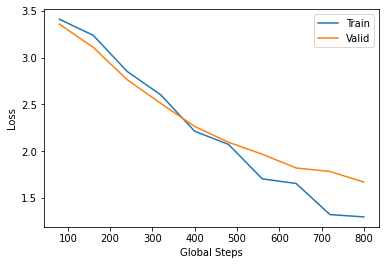

Model loaded from <== ./bertimbau_resp/7/metrics.pt


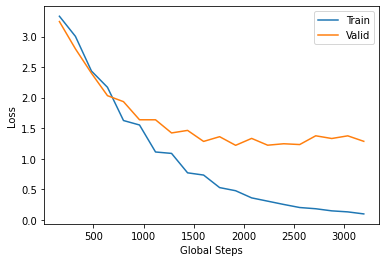

In [23]:
imprimeResultadoTreino(id_planilha = [1,7])


In [16]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')